In [1]:
import pandas as pd 
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("E:\Projects\Full customer data analysis\data\merged_data.csv")

In [10]:
data

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
824359,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
824360,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
824361,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
824362,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## RFM Analysis

#### Recency

In [14]:
## Finding the last transaction by each customer
reference_date = pd.to_datetime('2011-12-10')
grouped_data = df.groupby(by = 'Customer ID',as_index=False)['InvoiceDate'].max()
grouped_data['Last Invoice'] = grouped_data['InvoiceDate']
del grouped_data['InvoiceDate']

In [19]:
grouped_data['Last Invoice'] = pd.to_datetime(grouped_data['Last Invoice'])

In [21]:
grouped_data['Last Bought Days'] = (reference_date - grouped_data['Last Invoice']).dt.days
grouped_data

,Customer ID,Last Invoice,Last Bought Days
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,2
2,12348.0,2011-09-25 13:13:00,75
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,310
...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3
5938,18284.0,2010-10-06 12:31:00,429
5939,18285.0,2010-02-17 10:24:00,660
5940,18286.0,2010-08-20 11:57:00,476


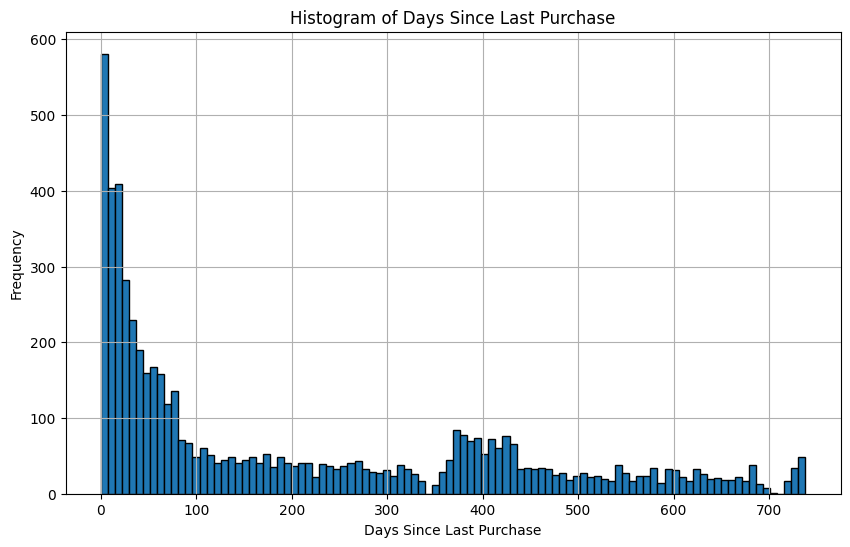

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(grouped_data['Last Bought Days'], bins=100, edgecolor='black')
plt.title('Histogram of Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.grid(True)

In [23]:
## Giving recency score on the basis quantiles of Last bought days
## divided into 5, so first 20% get 5 the last 20% get 1
grouped_data['Recency Score'] = pd.qcut(grouped_data['Last Bought Days'], q=5, labels=[5,4,3,2,1])
grouped_data

,Customer ID,Last Invoice,Last Bought Days,Recency Score
0,12346.0,2011-01-18 10:17:00,325,2
1,12347.0,2011-12-07 15:52:00,2,5
2,12348.0,2011-09-25 13:13:00,75,3
3,12349.0,2011-11-21 09:51:00,18,5
4,12350.0,2011-02-02 16:01:00,310,2
...,...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3,5
5938,18284.0,2010-10-06 12:31:00,429,1
5939,18285.0,2010-02-17 10:24:00,660,1
5940,18286.0,2010-08-20 11:57:00,476,1


### Frequency Score

In [26]:
temp = df.groupby('Customer ID', as_index = False)['Invoice'].count()
grouped_data['Transaction Count'] = temp['Invoice']
grouped_data

,Customer ID,Last Invoice,Last Bought Days,Recency Score,Transaction Count
0,12346.0,2011-01-18 10:17:00,325,2,48
1,12347.0,2011-12-07 15:52:00,2,5,253
2,12348.0,2011-09-25 13:13:00,75,3,51
3,12349.0,2011-11-21 09:51:00,18,5,180
4,12350.0,2011-02-02 16:01:00,310,2,17
...,...,...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3,5,986
5938,18284.0,2010-10-06 12:31:00,429,1,29
5939,18285.0,2010-02-17 10:24:00,660,1,12
5940,18286.0,2010-08-20 11:57:00,476,1,70


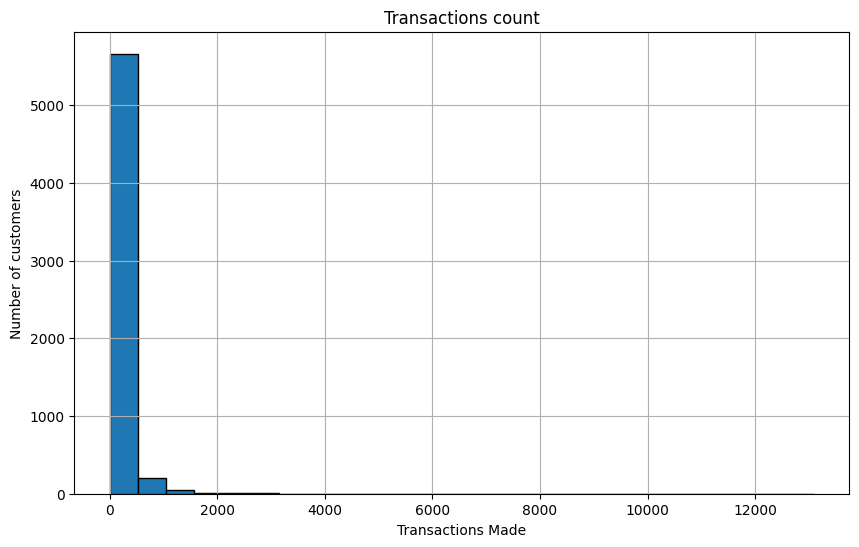

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(grouped_data['Transaction Count'], bins=25, edgecolor='black')
plt.title('Transactions count')
plt.xlabel('Transactions Made')
plt.ylabel('Number of customers')
plt.grid(True)

In [32]:
grouped_data['Frequency Score'] = pd.qcut(grouped_data['Transaction Count'], q=5, labels=[5,4,3,2,1])
grouped_data

,Customer ID,Last Invoice,Last Bought Days,Recency Score,Transaction Count,Frequency Score
0,12346.0,2011-01-18 10:17:00,325,2,48,3
1,12347.0,2011-12-07 15:52:00,2,5,253,1
2,12348.0,2011-09-25 13:13:00,75,3,51,3
3,12349.0,2011-11-21 09:51:00,18,5,180,2
4,12350.0,2011-02-02 16:01:00,310,2,17,4
...,...,...,...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3,5,986,1
5938,18284.0,2010-10-06 12:31:00,429,1,29,4
5939,18285.0,2010-02-17 10:24:00,660,1,12,5
5940,18286.0,2010-08-20 11:57:00,476,1,70,3


### Monetary Score

In [34]:
def calculate_cost(row):
    return row['Quantity'] * row['Price']
df['Cost'] = df.apply(lambda row : calculate_cost(row), axis = 1)

In [35]:
df

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cost
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...,...
824359,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
824360,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
824361,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
824362,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [36]:
temp = df.groupby(by = "Customer ID", as_index=False)['Cost'].sum()
grouped_data['Total value'] = temp['Cost']
grouped_data

,Customer ID,Last Invoice,Last Bought Days,Recency Score,Transaction Count,Frequency Score,Total value
0,12346.0,2011-01-18 10:17:00,325,2,48,3,155177.60
1,12347.0,2011-12-07 15:52:00,2,5,253,1,5633.32
2,12348.0,2011-09-25 13:13:00,75,3,51,3,2019.40
3,12349.0,2011-11-21 09:51:00,18,5,180,2,4452.84
4,12350.0,2011-02-02 16:01:00,310,2,17,4,334.40
...,...,...,...,...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3,5,986,1,2736.65
5938,18284.0,2010-10-06 12:31:00,429,1,29,4,486.68
5939,18285.0,2010-02-17 10:24:00,660,1,12,5,427.00
5940,18286.0,2010-08-20 11:57:00,476,1,70,3,1404.43


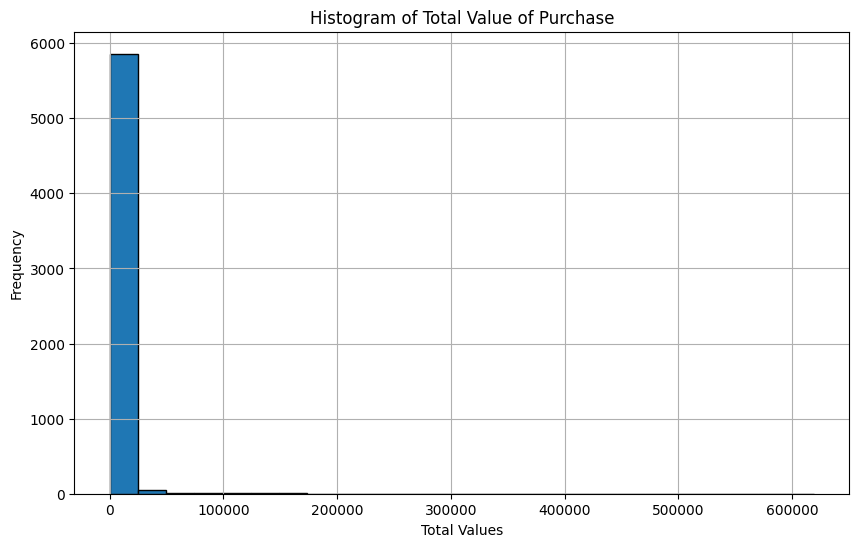

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(grouped_data['Total value'], bins=25, edgecolor='black')
plt.title('Histogram of Total Value of Purchase')
plt.xlabel('Total Values')
plt.ylabel('Frequency')
plt.grid(True)

In [40]:
grouped_data['Monetary Score'] = pd.qcut(grouped_data['Total value'], q=5, labels=[1,2,3,4,5])
grouped_data

,Customer ID,Last Invoice,Last Bought Days,Recency Score,Transaction Count,Frequency Score,Total value,Monetary Score
0,12346.0,2011-01-18 10:17:00,325,2,48,3,155177.60,5
1,12347.0,2011-12-07 15:52:00,2,5,253,1,5633.32,5
2,12348.0,2011-09-25 13:13:00,75,3,51,3,2019.40,4
3,12349.0,2011-11-21 09:51:00,18,5,180,2,4452.84,5
4,12350.0,2011-02-02 16:01:00,310,2,17,4,334.40,2
...,...,...,...,...,...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3,5,986,1,2736.65,4
5938,18284.0,2010-10-06 12:31:00,429,1,29,4,486.68,2
5939,18285.0,2010-02-17 10:24:00,660,1,12,5,427.00,2
5940,18286.0,2010-08-20 11:57:00,476,1,70,3,1404.43,4


## Modeling

In [41]:
df_score = grouped_data.iloc[:,[3,5,7]]
df_score

,Recency Score,Frequency Score,Monetary Score
0,2,3,5
1,5,1,5
2,3,3,4
3,5,2,5
4,2,4,2
...,...,...,...
5937,5,1,4
5938,1,4,2
5939,1,5,2
5940,1,3,4


In [42]:
from sklearn.cluster import KMeans
possilbe_clusters = range(1,16)
wcss = []
for k in possilbe_clusters:
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(df_score)
    wcss.append(km.inertia_)

In [43]:
x_axis = []
for i in possilbe_clusters:
    x_axis.append(i)
x_axis

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

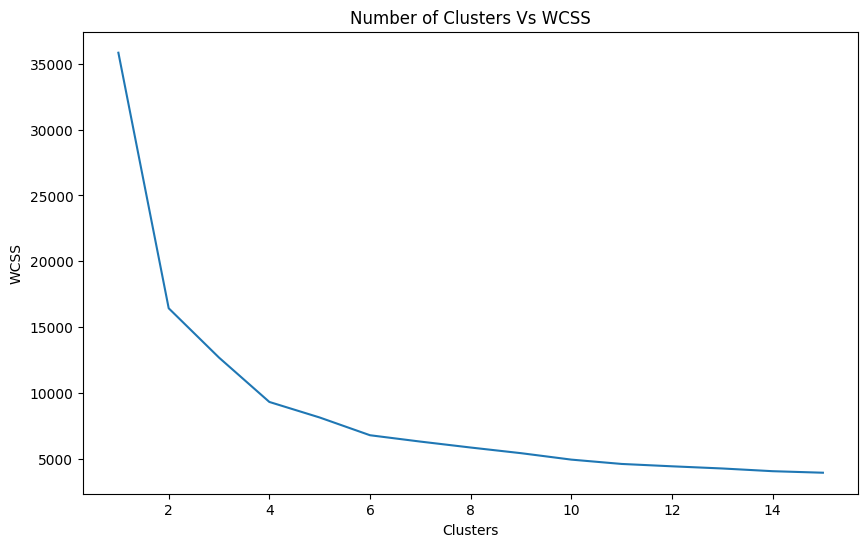

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis, wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Number of Clusters Vs WCSS')
plt.show()

In [45]:
from sklearn.cluster import BisectingKMeans
wcss_bikmeans = []
for k in possilbe_clusters:
    km = BisectingKMeans(n_clusters=k,random_state=42)
    km.fit(df_score)
    wcss_bikmeans.append(km.inertia_)

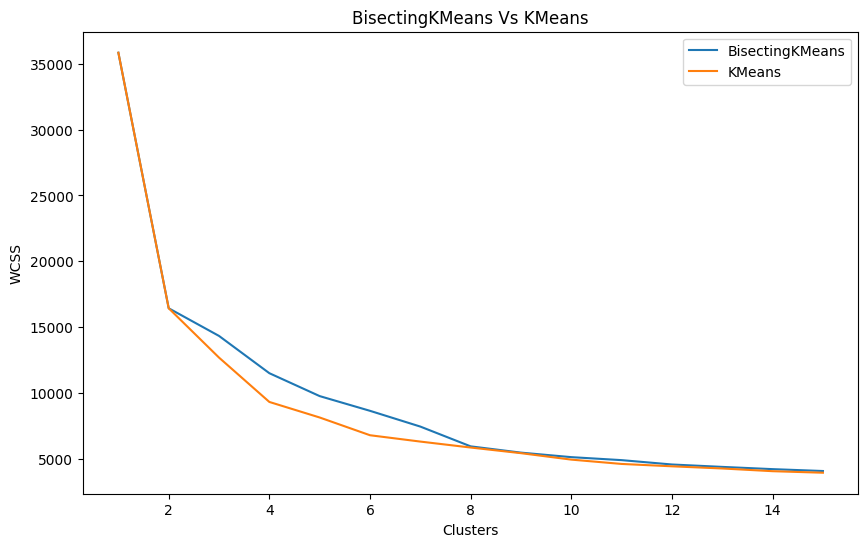

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis, wcss_bikmeans, label = 'BisectingKMeans')
plt.plot(x_axis,wcss, label = 'KMeans')
plt.legend(loc="upper right")
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('BisectingKMeans Vs KMeans')
plt.show()

##### I think Number of clusters = 4 will be best for analysis. For a more granual study of data the number of clusters can be increased.

In [47]:
model_cluster = BisectingKMeans(n_clusters=4)
model_cluster.fit(df_score)
grouped_data['Cluster'] = model_cluster.labels_
grouped_data

,Customer ID,Last Invoice,Last Bought Days,Recency Score,Transaction Count,Frequency Score,Total value,Monetary Score,Cluster
0,12346.0,2011-01-18 10:17:00,325,2,48,3,155177.60,5,1
1,12347.0,2011-12-07 15:52:00,2,5,253,1,5633.32,5,0
2,12348.0,2011-09-25 13:13:00,75,3,51,3,2019.40,4,1
3,12349.0,2011-11-21 09:51:00,18,5,180,2,4452.84,5,0
4,12350.0,2011-02-02 16:01:00,310,2,17,4,334.40,2,2
...,...,...,...,...,...,...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3,5,986,1,2736.65,4,0
5938,18284.0,2010-10-06 12:31:00,429,1,29,4,486.68,2,2
5939,18285.0,2010-02-17 10:24:00,660,1,12,5,427.00,2,2
5940,18286.0,2010-08-20 11:57:00,476,1,70,3,1404.43,4,2


In [49]:
with open(r'E:\Projects\Full customer data analysis\artifacts\rfm_analysis.pkl', 'wb') as file:
    pkl.dump(model_cluster, file)

In [51]:
grouped_data

,Customer ID,Last Invoice,Last Bought Days,Recency Score,Transaction Count,Frequency Score,Total value,Monetary Score,Cluster
0,12346.0,2011-01-18 10:17:00,325,2,48,3,155177.60,5,1
1,12347.0,2011-12-07 15:52:00,2,5,253,1,5633.32,5,0
2,12348.0,2011-09-25 13:13:00,75,3,51,3,2019.40,4,1
3,12349.0,2011-11-21 09:51:00,18,5,180,2,4452.84,5,0
4,12350.0,2011-02-02 16:01:00,310,2,17,4,334.40,2,2
...,...,...,...,...,...,...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3,5,986,1,2736.65,4,0
5938,18284.0,2010-10-06 12:31:00,429,1,29,4,486.68,2,2
5939,18285.0,2010-02-17 10:24:00,660,1,12,5,427.00,2,2
5940,18286.0,2010-08-20 11:57:00,476,1,70,3,1404.43,4,2


### Cluster level analysis

In [53]:
cluster_data = grouped_data.groupby('Cluster',as_index=False)['Last Bought Days'].mean()
temp1 = grouped_data.groupby('Cluster',as_index=False)['Transaction Count'].mean()
temp2 = grouped_data.groupby('Cluster',as_index=False)['Total value'].mean()
temp3 = grouped_data.groupby('Cluster',as_index=False)['Customer ID'].count()
temp4 = grouped_data.groupby('Cluster',as_index=False)['Transaction Count'].min()
temp5 = grouped_data.groupby('Cluster',as_index=False)['Total value'].min()
temp6 = grouped_data.groupby('Cluster',as_index=False)['Last Bought Days'].min()
cluster_data['Last_Bought_Days_Average'] = cluster_data['Last Bought Days']
cluster_data['Total_Transaction_Average'] = temp1['Transaction Count']
cluster_data['Total_Values_Average'] = temp2['Total value']
cluster_data['Last_Bought_Days_Min'] = temp6['Last Bought Days']
cluster_data['Total_Transaction_Min'] = temp4['Transaction Count']
cluster_data['Total_Values_Min'] = temp5['Total value']
cluster_data['Cluster_count'] = temp3['Customer ID']
del cluster_data['Last Bought Days']
cluster_data

,Cluster,Last_Bought_Days_Average,Total_Transaction_Average,Total_Values_Average,Last_Bought_Days_Min,Total_Transaction_Min,Total_Values_Min,Cluster_count
0,0,23.309006,430.006988,10141.442265,0,39,720.24,1288
1,1,123.844111,112.312356,2421.191754,0,1,294.02,1732
2,2,448.274137,27.584792,601.687130,191,1,0.00,1999
3,3,67.583965,22.587216,411.821930,1,1,0.00,923


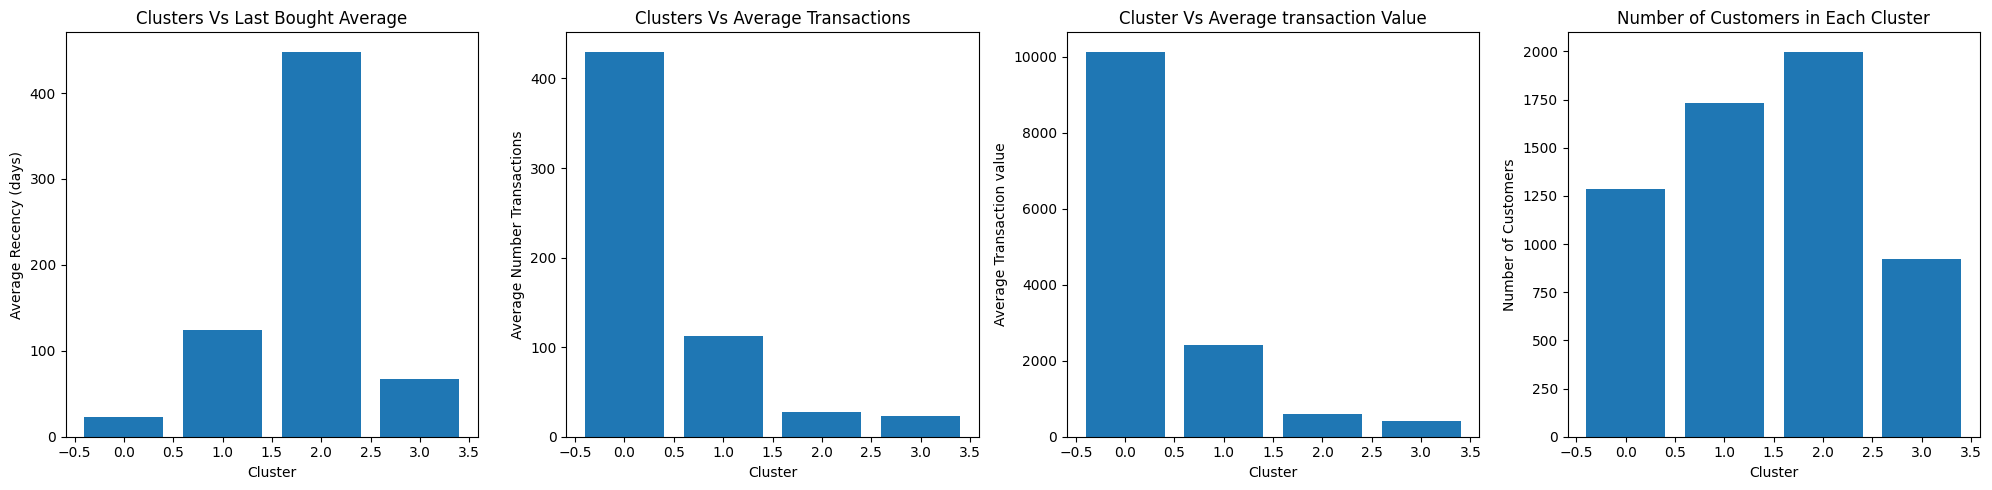

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

# Plot Last_Bought_Days_Average
ax1.bar(cluster_data['Cluster'], cluster_data['Last_Bought_Days_Average'])
ax1.set_title('Clusters Vs Last Bought Average')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Recency (days)')

# Plot Total_Transaction_Average 
ax2.bar(cluster_data['Cluster'], cluster_data['Total_Transaction_Average'])
ax2.set_title('Clusters Vs Average Transactions')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Average Number Transactions')

# Plot Total_Values_Average
ax3.bar(cluster_data['Cluster'], cluster_data['Total_Values_Average'])
ax3.set_title('Cluster Vs Average transaction Value')
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Average Transaction value')

# Plot Number of Customers in each Cluster
ax4.bar(cluster_data['Cluster'], cluster_data['Cluster_count'])
ax4.set_title('Number of Customers in Each Cluster')
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()